<a id="top"></a>
# The Multinomial Language Model: Using A Naive Bayes Classifier for Text Categorization


***

## Learning Goals
A multinomial language model and naive bayes classifier allows the user to classify documents automatically through test and training data. This model can provide insight on what the most likely outcome is using the syntax of the passage.

```
By the end of this tutorial, you will learn:

- What is the function of a Multinomial Language Model?
- What is the Bayes Theorem?
- What is a Multinomial Distribution?
- What is a Naive Bayes Classifier?
- How do you train a Naive Bayes Classifier?

```

## Introduction

**Multinomial Language Models**


The langauge model functions under the statistical assumption of probability calculations, or the Bayes Theorem. By assinging a probability to an event occuring after occuring other syntactic freuqnecies, it will assume the most likely category (Grimmer: 2022).


**The Bayes Theorem**
\begin{equation}
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\end{equation}

This equation generates the conditional probabilites for an event to happen, knowing the current conditional probabilites. The equation solves for the posterior (or conditional) probability, represented as P(A|B), using the prior probabilitiles. The posterior probability establishes the likelihood of an event occuring knowing that an event is a fixed truth. 'Translated' into relative understandings the Bayes Theorem:

The conditional probability of A (knowing B is a fixed truth) is equal to the conditional probability of B (A is fixed truth) times the prior probability of A occuring, divided by the prior probability of B occuring. The model uses a frequentist interpretation, or the proportion of outcomes for a given event.

For example, the Bayes Theorem would calculate the likelihood the phrase "climate change" occurs in a negative sentiment, with prior information about likelihood of occuring in positive and negative sentiments.



**Multinomial Distribution**

For the purposes of this tutorial an indepth understanding of multinomial distribution is not required. It contributes to the Multinomial Naive Bayes classifier through restriction. When there is an event, labeled as n, it can have a certain number of outcomes labeled as k. For each n, k must be a mutually exclusive category. This limits overlap in any categorization as the Bayes theorem used in the models accounts for events which co-occur in the same corpora.x

**The Naive Bayes Classifier**

The classifier combines the above concepts of a multinomial language model, the bayes theorem, and multinomial distribution. Introduced by the classifier is the concept of a naive assumption, which is supported through the multinomial distribution. While understanding the independncece in label categoies (n and k are mutally exclusive), the classifier assumes independence between variables. For example, if the classifier was sorting based on percieved heaviness into light or heavy, the assumption that increased volume and increased width operate independently. This contrasts to human background as we can assume that as the width increases the volume must increase proportionately.





---

## Imports
First general libraries will be downloaded:
- *NLTK* used to manipulate text data such as stemming, stopword removal, and lemmatization.
- *matplotlib* for graphing and visualizing categorization tasks
- *seaborn* for final graph creation
- *scikit-learn* for naive bayes modeling and feature extraction

Specific libraries which will be imported are:
- *numpy* for calculations
- *pandas* for dataframe manipulation
- *regex* for string parsing
- *os, types* for system management
- *datasets* for data imports from huggingface NLTK

In [ ]:
'''LIBRARY DOWNLOADING'''

%pip install nltk
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
'''LIBRARY IMPORTS'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sb
import re
import os, types

from datasets import list_datasets,load_dataset

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data Loading

Data used in this tutorial will be provided from scikit-learn to make data more accesssible on multiple devices.

  

  The data used in this tutorial is housed in the NLTK huggingface library, and can be imported with 'load_dataset'. Data used in this tutorial was generated by Ebenge Usip, and featured in the paper "Hierarchical Pre-training for Sequence Labelling in Spoken Dialogue (SILICONE). The Corpus used is the "Daily Dialog Act Corpus", or DYDA_DA, which categorizes the the kind of text into four categories "commissive", "directive", "informative", or "question".
  
📖 More information about the dataset and paper can be found at this [hyperlink](https://huggingface.co/datasets/eusip/silicone), or at the repository linked there as well. NLTK Hugging Face provides multiple data sets that already coded, which allow for training models to become much easier.

In [ ]:
ds = load_dataset("eusip/silicone","dyda_da")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for eusip/silicone contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/eusip/silicone.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/87170 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8069 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7740 [00:00<?, ? examples/s]

In [ ]:
## Looking at a bit of the coded data.

ds['train'][0:len(ds)]

## This model comes precoded with utterances, dialogue act, id (as each conversation is sequential in the data set) and then a label and an IDX label

{'Utterance': ['say , jim , how about going for a few beers after dinner ?',
  'you know that is tempting but is really not good for our fitness .',
  'what do you mean ? it will help us to relax .'],
 'Dialogue_Act': ['directive', 'commissive', 'question'],
 'Dialogue_ID': ['1', '1', '1'],
 'Label': [1, 0, 3],
 'Idx': [0, 1, 2]}

In [ ]:
'''Let's turn this into a dataframe with all of the data combined. While it does automatically provide a train, test, and validate, through this dataset for the purposes of this tutorial
we can assume the data in its combined form to test out how to splice the data using NLTK tools.'''

  # creating a storage list of all of the utterances
utterance_list = []

  # iterating through each set and appending the entire row to the storage list
for i in range(0,len(ds['train'])):
  entry = ds['train'][i]
  utterance_list.append(entry)

for i in range(0,len(ds['test'])):
  entry = ds['test'][i]
  utterance_list.append(entry)

for i in range(0,len(ds['validation'])):
  entry = ds['validation'][i]
  utterance_list.append(entry)

In [ ]:
  # combining all of the utternances into the variable 'df'
df = pd.DataFrame.from_dict(utterance_list)

df.head()

,Utterance,Dialogue_Act,Dialogue_ID,Label,Idx
0,"say , jim , how about going for a few beers af...",directive,1,1,0
1,you know that is tempting but is really not go...,commissive,1,0,1
2,what do you mean ? it will help us to relax .,question,1,3,2
3,do you really think so ? i don't . it will jus...,question,1,3,3
4,i guess you are right.but what shall we do ? i...,question,1,3,4


***

## **Creating a Multinomial Bayes Language Model**

The MNB has six steps to train: 1. prepcoess data and exploratory analysis 2. feature extration, 3. splitting data 4. training the MNB model, 5. evaluating the performance 6. using the model to make predictions.

These steps help sthe model to have the best text to pass into the model, turn the text into a quantiative representation of it, train the model on the data, and assess its preformance in terms of accuracy for its probability predictions.

#### **Preprocessing Text Data & Exploratory Data Analysis**

Preprocessing depends on the task at hand. The most popular options are lemmatization, stopword extraction, and stemming. This practice is something that is used beyond just MNB, but applied in many other models like Bag of Words, Topic Modeling, and Word Embeddings. By preprocessing the data it allows for patterns to be identified regardless of the word form or potential filler information. The lemmatizer removes any word forms, so the words 'stop', 'stopping', and 'stopped', will all be treated the same as the shared root is indifferent to word tense. However, these methods should be used with discretion as in some cases removing stopwords may confuse analysis (for example, trying to identify a gender difference in text but the stopwords list used remove she/he/they pronouns.)

📖
The documentation for the PorterStemmer can be found [here](https://tartarus.org/martin/PorterStemmer/) with more information about its origination. For more information about the Wordnet Lemmatizer can be found [here](https://wn.readthedocs.io/en/latest/guides/lemmatization.html).

#### **Feature Extraction**

Feature extraction is what allows the machine to work. It converts text into numbers which can then be stored as variables to calculate probabilities with.

#### **Splitting Into Train, Test, and Validation**

Splitting data allows for some data to be 'saved'. When assessing the model it instead does not rely on its 'memory' and forces it to be trained on its assumption and pattern recognition. Setting outside the data is for the purpose of multiple iterations of training as well, but this will not be explored in this tutorial.

#### **Training the MNB Model**

The test data is passed into the Multinomial Naive Bayes Model, and then the model preforms the Bayes Theorem to understand the probability of a text label to be placed into a certain category. This operates under the Naive assumption, and thus the categories must not overlap. The model is trained with other assumptions, like smoothing and regularization techniques.

#### **Evaluating the Performance of the Model**

A model can be assessed through visual representations, variation for training parameters, and training set sizes. This can provide more information about how conclusions can be made when using the model to classify additional data and in what ways the model can be generalized.

#### **Using the Model to Make Predictions**

The model can be passed additional data that can be classified based on the prior assumptions through the model. This can be any amount of data from a string to a list and returns labels for each of the strings passed in.

____

#### **1. Preprocessing Data & Exploratory Data Analysis**

In [ ]:
'''SOURCE CODE: ['https://github.com/ekavlako/think/blob/main/tutorials/naive-bayes/naive-bayes-tutorial.ipynb?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-classifying-data-multinomial-naive-bayes-algorithm]'''


  ## This function takes a text, requests a parameter for stemming, and then if stopwords should be removed. It uses regex to strip out any text irregularities like dates or special characters and then passes the cleaned text into filtered tokwns.
  ## The output for this function is a cleaned string of text.
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    #stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [ ]:
'''Let's first take a Bag of Words Approach to cleaning the data, and create a stemmed version of the next next to the actual utterance.
Taking steps such as these may save on computational resources and model accuracy as there is less filler tokens to process. '''


  ## This section of code uses the above function to utilize PorterStemmer to create a bag of words utterance. This removes any potential inconsistencies in the data and makes it easier to convert during feature extraction.
corpus = []
for i in range (0,len(df)):
  text = text_clean(df['Utterance'][i],"S",True)
  corpus.append(text)

  ## Let's create a column in the dataframe to append the corpus next to the utterances

df.insert(1,'PS',corpus)

### **Exploratory Data Analysis**

Exploratory Data Analysis (or EDA) is a process which allows for the researchers to better understand the data that is provided. This can create a stage for the researcher to also have better insight into the model, as it can explain how the test data is split, if there is any missing data, and the size of the dataset. This process is depednent on what the goal of your research is, and what the phenomenon of interest is you are trying to quantify.

📖This Geeks for Geeks [article](https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/) provides more information and methods for EDA for numerical data, and other varieties of plots.


In [ ]:
df.head()

,Utterance,PS,Dialogue_Act,Dialogue_ID,Label,Idx
0,"say , jim , how about going for a few beers af...",say jim go beer dinner,directive,1,1,0
1,you know that is tempting but is really not go...,know tempt realli good fit,commissive,1,0,1
2,what do you mean ? it will help us to relax .,mean help us relax,question,1,3,2
3,do you really think so ? i don't . it will jus...,realli think dont make us fat act silli rememb...,question,1,3,3
4,i guess you are right.but what shall we do ? i...,guess rightbut shall dont feel like sit home,question,1,3,4


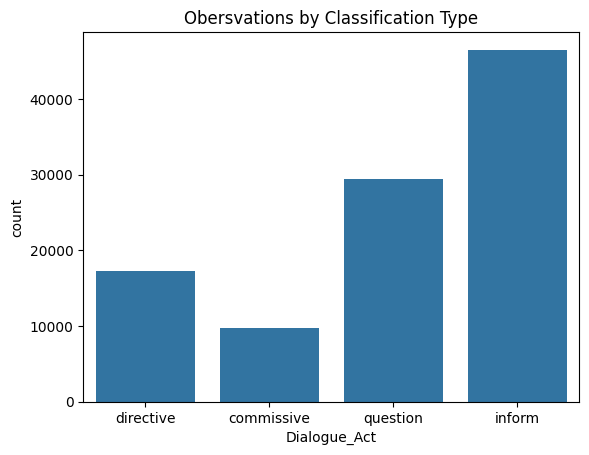

'This dataset has much more in data in regards to an informational dialogue act. This tells us that the model may be more accurate when classifying this type of data.'

In [ ]:
'''First, let's explore what the entire dataset is composed of in terms of classification type. This step is important to see the balance of the dataset.
An imbalanced dataset may lead to overfitting. This could result in a probability that is not accurately representative of the data. (Grimmer, Roberts, Stewart: 2022)  '''

  ## Let's generate a basic plot to examine the dialogue act (or the labels)
ax = sb.countplot(x=df['Dialogue_Act'])
plt.title("Obersvations by Classification Type")
plt.show()

'''This dataset has much more in data in regards to an informational dialogue act. This tells us that the model may be more accurate when classifying this type of data.'''

In [ ]:
'''Next, let's explore the shape and the comprehension of the data. Using df.info() we can learn about the columns, and ensure that there is no missing data.
Checking that the d-type is appropriate for NLP techniques is also important. This could prevent some frustrating type errors down the road!'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102979 entries, 0 to 102978
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Utterance     102979 non-null  object
 1   PS            102979 non-null  object
 2   Dialogue_Act  102979 non-null  object
 3   Dialogue_ID   102979 non-null  object
 4   Label         102979 non-null  int64 
 5   Idx           102979 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.7+ MB


In [ ]:
'''And one more check to ensure there is not missing data! This uses a combination of the function .isnull() to check for value types, and .sum() to aggregate missing amongst the columns.
It looks like there is no missing data here, so the MNB can be calculated without any additional data cleaning'''

df.isnull().sum()

,0
Utterance,0
PS,0
Dialogue_Act,0
Dialogue_ID,0
Label,0
Idx,0


#### **2. Feature Extraction**

The Count Vectorizer is from the [sklearn.feature_extraction library](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). The count vectorizer converts a collection of text documents to a token. The amount of vectors is generated from the length of the unique words, or the vocabulary. If there is a clear reserach topic, a vocabulary can be created that can then be passed in. This can result in a more focused anaylsis.
  
📖 More information about the CountVectorizer can be found in this [IBM Article](https://www.ibm.com/reference/python/countvectorizer). It clearly outlines some of the other features in the function like stopword removal or frequency regularization (preventing overfitting).

In [ ]:
'''Instantiating the CountVectorizer without any additional parameters.'''

count_vectorizer = CountVectorizer()

#### **3. Splitting Into Train, Test, and Validation Data**

 Sample splitting is a process which paritions the data into train, test, or validation. The first category, train, is used to train the model. Test is used to continue training the model after loss is assessed. Validation is used in confusion matrixes to then assess how accurate the machine classification is (Bai et al 2021).

 📖 The function used to parition the data is from [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). This is a function wrapper that uses the ShuffleSplit() which generates random splits for the data. Parameters in the function are:
```
*   *arrays: the corpus in the form of a list, dataframe, or array
*   test_size: a float between 0.0 and 1.0 which represents the amount of data to include in a test split
*   train_size: a float between 0.0 and 1.0 which represents the amount of data to include in a train set. If the parameter is left empty, it will generate a proportion that complements the test_size
*   random_state: an integer used to control shuffling across cells. It allows for the split ot be reproducible across function calls.

```

In [ ]:
'''X is defined as the qualitative data and y is defined as the numerical label for the coded utterances.'''
X = count_vectorizer.fit_transform(df['Utterance'])
y = df['Label']

In [ ]:
'''Let's first explore the output of the function before assinging it to a variable.

The output of this variable is in two sparse matrixes. The first is 757861 rows and 252496 rows. The smaller of the two matrixes is the test set and 25% of the entire data set.'''

print (train_test_split(X, y, test_size=0.25, random_state=81))

print ("\n\nThe type of the output is :",type(train_test_split(X,y, test_size=0.25, random_state=81)))
print ("The length of the list is: ",len(train_test_split(X, y, test_size=0.25, random_state=81)))
'''The first two items of the list are the lengths of the sparse matrices and the last two are the matrices for test and train.'''

[<77234x18647 sparse matrix of type '<class 'numpy.int64'>'
	with 757861 stored elements in Compressed Sparse Row format>, <25745x18647 sparse matrix of type '<class 'numpy.int64'>'
	with 252496 stored elements in Compressed Sparse Row format>, 12761    2
4320     2
44509    0
33027    2
72167    3
        ..
3523     2
16331    1
4171     3
13230    3
48963    2
Name: Label, Length: 77234, dtype: int64, 71452    2
60188    3
34946    2
81247    2
23237    2
        ..
7177     2
7978     3
50107    2
34887    2
9895     3
Name: Label, Length: 25745, dtype: int64]


The type of the output is : <class 'list'>
The length of the list is:  4


'The first two items of the list are the lengths of the sparse matrices and the last two are the matrices for test and train.'

In [ ]:
'''This cell assigns the variables of the list output of the train_test_split. These outputs will be used to put into the MNB.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)


#### **4. Training the Multinomial Naive Bayes Model**

The MultinomialNB model is provided through sklearn. The parameters which can be passed into the instantiation are alpha, which is a smooting parameter between 0 and 1. Other paratmers are fit_prior or class_prior, which can be elaborated on in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).


  After instantiating the model using fit takes the training data created in train_test_split. The parameters of fit are the X (training vectors), Y (target values), and optional sample weights. The model retursns the 'instance itself' as a result of the class.

In [ ]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

#### **5. Evaluating the Performance of the Model**

Model.Predict() is the first part of assessing the accuracy. It takes the test vectors reserved earlier and generates predicted labels.

  
The accuracy score then references the test variables to the model predictions and creates an accuracy variable. The parameters of the accuracy_score function are:

```
*   y_true: the labels reserved from the test set
*   y_pred: the predictions generated in model.predict
*   normalize: the option to return the fraction of correctly classified samples instead of the number
```

📖 Other forms of the accuracy prediction can be viewed in the documentation linked [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

📖 The documentation for [model.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict) can be found here.

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 68.43%


Let's explore more how alpha could impact the accuracy of the model. In this for loop, round steps are tested in the alpha, to check for accuracy.

  Through each iteration of the loop, the alpha increases from 65% to 68%, so almost three full percentage points. The alpha is set to 1 normally, which has the highest predicted accuracy.

In [ ]:
for value in np.arange(0,1.1,0.1):
  model = MultinomialNB(alpha=value)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print (f'Accuracy with alpha {value}: {accuracy*100:.2f}%')

Accuracy with alpha 0.0: 65.55%
Accuracy with alpha 0.1: 66.55%
Accuracy with alpha 0.2: 67.07%
Accuracy with alpha 0.30000000000000004: 67.37%
Accuracy with alpha 0.4: 67.49%


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy with alpha 0.5: 67.61%
Accuracy with alpha 0.6000000000000001: 67.82%
Accuracy with alpha 0.7000000000000001: 68.03%
Accuracy with alpha 0.8: 68.21%
Accuracy with alpha 0.9: 68.34%
Accuracy with alpha 1.0: 68.43%


Now let's explore how a different split between test and train data could impact accuracy as well. The test size is a parameter which changes how much data the model is trained on.


*   10%: 68.27%
*   25%: 68.43%
*   50%: 67.73%
*   75%: 66.75%


Through these testings, it shows that the 25% split has the highest accuracy. A validation process as simple as this can help ensure the best results for accuracy.

In [ ]:
  ## Paritioning the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=81)

    ## Training the model with alpha set to 1
model = MultinomialNB()

    ## Fitting the training data
model.fit(X_train, y_train)

    ## Assessing the predicted accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy a training size of 0.50: {accuracy*100:.2f}%')

''' changing to 0.75'''
## Paritioning the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=81)

    ## Training the model with alpha set to 1
model = MultinomialNB()

    ## Fitting the training data
model.fit(X_train, y_train)

    ## Assessing the predicted accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy a training size of 0.75: {accuracy*100:.2f}%')

''' changing to .10 '''
## Paritioning the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=81)

    ## Training the model with alpha set to 1
model = MultinomialNB()

    ## Fitting the training data
model.fit(X_train, y_train)

    ## Assessing the predicted accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy a training size of 0.10: {accuracy*100:.2f}%')

Accuracy a training size of 0.50: 67.73%
Accuracy a training size of 0.75: 66.75%
Accuracy a training size of 0.10: 68.27%


**Confusion Matrix**

This graph is a representation of the models predictions, and a way to understand the models performance. On the X axis is the Models predictions on the labels set aside to test the data. On the Y axis is the true labels. In each cell it shows the amount that something was sorted on. The color scaling for this graph shows a lighter color with a higher value in the cell, not where there is accuracy.

  For example, the first cell value is 203, this means that the model predicted 203 values to actually be the 'true label', going down to the cell below it with a true label of 1 and a predicted label of zero, the model guessed 42 times that it was actually a label of zero.   

 📖 For more information, this [Science Direct article](https://www.sciencedirect.com/science/article/pii/B978012820125100018X#br0085) provides an excellent example and case study using the confusion matrix in section 7.4.

📖 The skikit-learn documentation for the [confusion matrix function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [confusion matrix display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) can be found linked here.

   

In [ ]:
'''First, let's look at the confusion matrix in its raw form. The parameters require the test and the prediction label values
so not the actual text. Once the data is passed in, the confusion matrix function returns an array of the predicted values in relationship
to the actual values.  '''

cm = confusion_matrix(y_test,y_pred)

array([[ 203,  181,  431,  115],
       [  42, 1058,  374,  225],
       [ 209,  471, 3584,  424],
       [  27,  248,  521, 2185]])

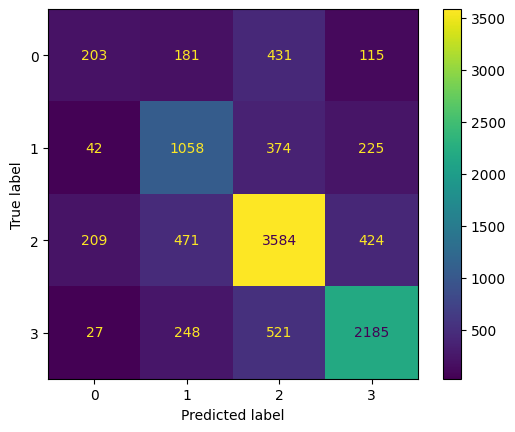

In [ ]:
''' The confusion Matrix Display function takes the confusion matrix array and display labels to visually represent the accuracy of
the model. This graph can provide a quick view of how the model preformed, potential overfitting, and frequency of predicted label.'''

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

#### **6. Using the Model to Make Predictions**

Let's test out the model to make predictions given new data. To do so, this will use a combination of the count vectorizer, and model.predict() to identify a potential label.

The model.predict() function was used earlier to pass in multiple utterances, but for these tests we can just pass in one string at a time.

In [ ]:
''' Here is a reminder of the variables for the model'''

set(df['Dialogue_Act'].to_list())

{'commissive', 'directive', 'inform', 'question'}

In [ ]:

  ## First creating a list of new utterances. The list passed in will have one of each from teh above dialogue acts
new_utterance = ['I need you to finalize the reports by Monday',
                 'The documentation can better explain it sometimes',
                 'Plants function of phtosynthesis is crucial for sustaining life on Earth',
                 'What are the strategies that you use to validate a models accuracy?'
                 ]


  ## Now lets tranform the new utterances using the same count_vectorizer as earlier
new_X = count_vectorizer.transform(new_utterance)

  ## Use model.predict() to identify the predicted labels for the text and print them out
predicted_label = model.predict(new_X)
print (predicted_label)


'''It appears that the model has an accuracy rate of 75% for these sentences, which is much higher than the accuracy rate for the entire corpus. Using these methods for prediction requires a large training set and sentences which are similar to the original corpus to maintain accuracy.'''

[1 2 3 3]


'It appears that the model has an accuracy rate of 75% for these sentences, which is much higher than the accuracy rate for the entire corpus. Using these methods for prediction requires a large training set and sentences which are similar to the original corpus to maintain accuracy.'

---
## **Review**

This section provides the pseudocode and the outputs of the desired code for training the MNB with a different dataset. This data is from Hugging Face, but uses Yelp reviews, and attemps to predict the number if stars the reviewer has granted the place.   

The code used is very similar to that above and can be referenced if you get stuck!

In [ ]:
  '''LOADING THE DATASET'''

  ## Importing the Dataset
  ds = load_dataset('Yelp/yelp_review_full')

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
## Inspecting the dataset

{'label': [4, 1],
 'text': ["dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.",
  "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have offi

In [ ]:
## Combining all utterances into a dataframe

In [ ]:
'''Let's turn this into a dataframe with all of the data combined. While it does automatically provide a train, test, and validate, through this dataset for the purposes of this tutorial
we can assume the data in its combined form to test out how to splice the data using NLTK tools.'''

  # creating a storage list of all of the utterances
utterance_list = []

  # iterating through each set and appending the entire row to the storage list
for i in range(0,len(ds['train'])):
  entry = ds['train'][i]
  utterance_list.append(entry)

for i in range(0,len(ds['test'])):
  entry = ds['test'][i]
  utterance_list.append(entry)

    # combining all of the utternances into the variable 'df'
df = pd.DataFrame.from_dict(utterance_list)

df.head()

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


In [ ]:
''' EXPLORATORY DATA ANALYSIS'''

  ## Create a plot to examine the distribution of the labels



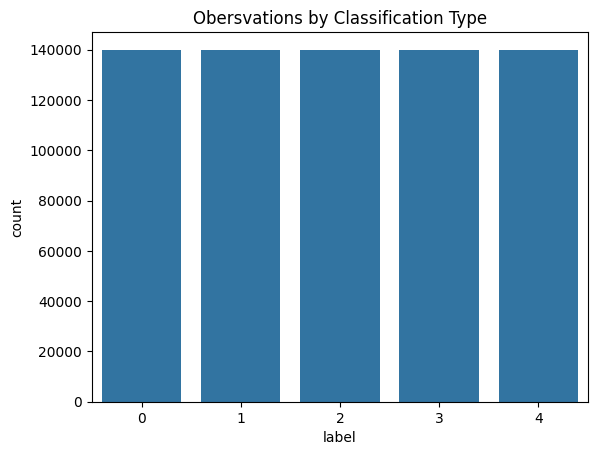

In [ ]:
  ## Check the shape and the datatype of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   700000 non-null  int64 
 1   text    700000 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
  ## Check if there is any null values

,0
label,0
text,0


In [ ]:
'''FEATURE EXTRACTION'''

  ## Instantiate a Count Vectorizer


In [ ]:
'''SPLITTING INTO TRAIN AND TEST DATA'''

  ## Create an X variable for the qualitative data


  ## Create a y variable for the quantitative data (labels)


  ## Create train and test data using the below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
''' TRAIN THE MULTINOMIAL NAIVE BAYES MODEL'''

  ## Instantiate the Model


` ## Train the Model

MultinomialNB()

In [ ]:
''' EVALUATE THE PERFORMANCE OF THE MODEL'''

  ## Pass In The test parameters to model.predict()


  ## Generate an accuracy score


  ## Print the accuracy score in a percentage format

Accuracy: 53.19%


In [ ]:
  ## Test the accuracy of different alphas and refine the model to have the best accuracy

    ## Write a for loop

      ## Train the model with a new alpha

      ## Assess the Accuracy and Print Out A Percentage

Accuracy with alpha 0.3: 53.06%
Accuracy with alpha 0.4: 53.11%
...


In [ ]:
  ## Re-instantiate the model to have the highest accuracy with a new alpha

MultinomialNB(alpha=0.9)

In [ ]:
  ## Create a confusion matrix

    ## Instantiate the Matrix


    ## Display as a plot

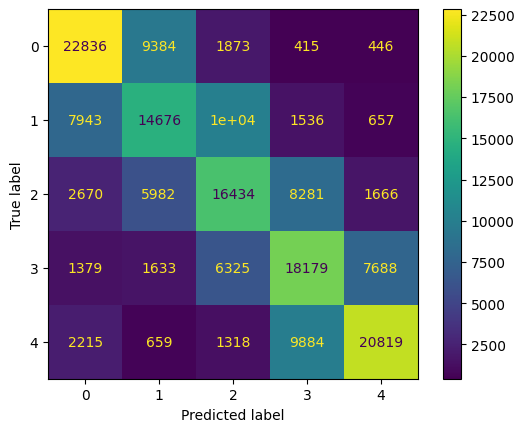

In [ ]:
''' USE THE MODEL TO MAKE PREDICTIONS '''

    ## Create new Yelp Reviews (or find a few from your favorite place!)


    ## Transform the new Text Values using the CV


    ## Predict new labels for the new reviews

In [ ]:
''' MODEL REFLECTION '''

## Evalute the performance of the model. What categories of reviews did it most accurately predict? Most incorrectly?


## How does the probability change between different reviews, are there any features of language that may confuse the model?

## About this Notebook
This notebook provides an overview of how to use the Multinomial Naive Bayes function, and what each of the components are.

**Author:** Natalie Castro
**Updated On:** August 19, 2024

## Citations
Here are the academic citations for further reading and understanding.

```
* Bai, Y., Chen, M., Zhou, P., Zhao, T., Lee, J., Kakade, S., ... & Xiong, C. (2021, July). How important is the train-validation split in meta-learning?. In International Conference on Machine Learning (pp. 543-553). PMLR.
* Chapter 6: The Multinomial Language Model. (2022). In J. Grimmer, M. E. Roberts, & B. M. Stewart, Text as data: A new framework for machine learning and the social sciences (pp. 60–69). Princeton University Press.
* Hernández-Del-Toro, T., Martínez-Santiago, F., & Montejo-Ráez, A. (2022). Assessing classifier’s performance. In Biosignal Processing and Classification Using Computational Learning and Intelligence (pp. 131–149). Elsevier. https://doi.org/10.1016/B978-0-12-820125-1.00018-X
* “Think/Tutorials/Naive-Bayes/Naive-Bayes-Tutorial.Ipynb at Main · Ekavlako/Think.” Accessed August 9, 2024. https://github.com/ekavlako/think/blob/main/tutorials/naive-bayes/naive-bayes-tutorial.ipynb.
* Usip, Ebenge. “Eusip/SILICONE-Benchmark.” Python, May 1, 2024. https://github.com/eusip/SILICONE-benchmark.



```

***